<a href="https://colab.research.google.com/github/vishnudk/Iris-FLower-Classification/blob/master/Copy_of_Iris_Classification_workbook.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Iris Flower Classification

* Dataset : Iris Flower Dataset
* Three flowers of iris species
* Features: Sepal_legth, Sepal_Width,Petal_length,Petal_width ### Objective : Classify a new flower as belonging to one of the 3 classes given the 4 features

In [0]:
# Importing Necessary Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
#Load iris.csv in to a pandas dataframe.
iris_data=pd.read_csv('iris.csv')
iris_data.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [5]:
#(Q) how many data points and features?
iris_data.shape

(150, 6)

In [6]:
#(Q) what are the column names in our dataset?
iris_data.columns

Index(['Id', 'SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm',
       'Species'],
      dtype='object')

In [11]:
#(Q) how many data points for each class are present?
#(or) how many flowers for each species are present>
iris_data['Species'].value_counts()

Iris-versicolor    50
Iris-virginica     50
Iris-setosa        50
Name: Species, dtype: int64

## Exploratory Data Analysis (EDA)

### Univariate ( Histogram )

(array([37., 13.,  0.,  3.,  8., 26., 29., 18., 11.,  5.]),
 array([1.  , 1.59, 2.18, 2.77, 3.36, 3.95, 4.54, 5.13, 5.72, 6.31, 6.9 ]),
 <a list of 10 Patch objects>)

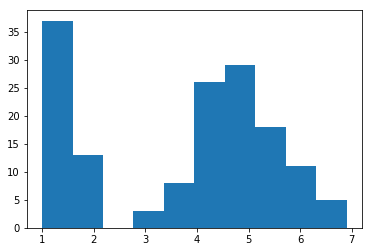

In [13]:
#Histogram of petal length

plt.hist(iris_data['PetalLengthCm'])


In [0]:
#Histogram of petal width



In [0]:
#Histogram of sepal length



In [0]:
#Histogram of sepal width




### Bi-Variate Analysis ( Scatterplot )

In [0]:
#2D scatter plot:




In [0]:
#2D scatter plot with color-coding for each flower type/class.
#here "sns" corresponds to seaborn.





### Pairplot 

## Data Preprocessing

In [15]:
# Check whether our dataframe has null
iris_data.isnull().sum()

Id               0
SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

In [0]:
#(Q) what is the mean, varience and standard dieviation of the each feature?
iris_data.describe()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667
std,43.445368,0.828066,0.433594,1.764420,0.763161
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


In [0]:
# Remove label (Species) and form feature list
x=iris_data.drop(["Species"],axis=1)
# Add Species and form label list
y=iris_data["Species"]
x.pop('Id')

In [18]:
x.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


## Machine Learning

 **Classification** : samples belong to two or more classes and we want to learn from already labeled data how to predict the class of unlabeled data

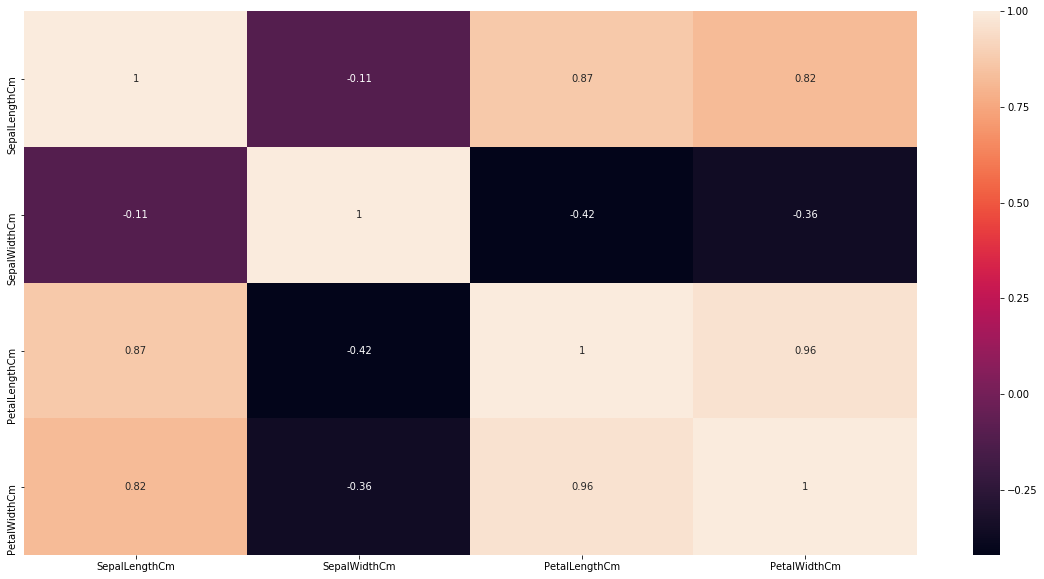

In [23]:
#heatmap is to identify the highly correlated features
corr = x.corr()
plt.figure(figsize=(20,10))
sns.heatmap(corr,annot=True,color='white')

In [0]:
# import ml libraries
from sklearn import metrics
from sklearn.model_selection import train_test_split 

In [0]:
#Splitting The Data into Training And Testing Dataset
# the attribute test_size=0.3 splits the data into 70% and 30% ratio. train=70% and test=33%
x_train,x_test,y_train,y_test=train_test_split(x,y,train_size=0.9,random_state=2)

In [27]:
x_train.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
54,6.5,2.8,4.6,1.5
41,4.5,2.3,1.3,0.3
96,5.7,2.9,4.2,1.3
144,6.7,3.3,5.7,2.5
89,5.5,2.5,4.0,1.3


In [0]:
#select the algorithm
from sklearn import neighbors
model=neighbors.KNeighborsClassifier(n_neighbors=5)

In [31]:
# we train the algorithm with the training data and the training output
model.fit(x_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [0]:
#now we pass the testing data to the trained algorithm
predict=model.predict(x_test)

In [33]:
predict

array(['Iris-setosa', 'Iris-setosa', 'Iris-virginica', 'Iris-setosa',
       'Iris-setosa', 'Iris-virginica', 'Iris-setosa', 'Iris-virginica',
       'Iris-virginica', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-versicolor'], dtype=object)

In [34]:
#now we check the accuracy of the algorithm.
from sklearn.metrics import accuracy_score
#we pass the predicted output by the model and the actual output
print(metrics.accuracy_score(predict,y_test))

1.0


Try on your own :
* Using Petals over Sepal for training .